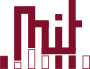 Department of Artificial Intelligence and Systems Engineering, ©2024, BME-MIT, Gabor Revy, Dr. Gabor Hullam  
# **VIMIAC16 - Artificial Intelligence**
## 2024 Fall Semester
## **LAB 5 - Regression models and neural networks**

### **Objective of the Laboratory**
The goal of this laboratory is to familiarize students with linear and logistic regression, and to introduce the basics of neural networks based on these models.

<!-- Theoretical background, material for home preparation -->

# **Regression and Classification** #

Both regression and classification are supervised machine learning problems. In supervised machine learning, we have samples, i.e., (input; expected output) pairs. Our goal is to create a model capable of learning the mapping between input-output pairs based on the samples, which can then be applied to samples not yet seen by the model. Typical problems include:
- Based on physiological characteristics: whether the person is sick or not (C)
- Based on economic indicators: next year's GDP estimation (R)
- Based on an image: what object is visible in the picture (C)
- Based on the characteristics of houses: estimating their price (R)

In the previous examples, the classification (C) and regression (R) tasks are marked, from which the difference might be felt:

- In classification, our target variable (which we want to "predict", predict) is a category label (sick/not sick; car/pedestrian/traffic sign/traffic light)
- In regression, it is a continuous value (value of GDP, value of a house).

### [Linear Regression](#scrollTo=K2Dmh6doKQ8r&line=61&uniqifier=1)

### [Binary Classification with Logistic Regression](#scrollTo=kR3GgmL7NKjK&line=30&uniqifier=1)

### [Neural Networks](#scrollTo=6uC4wI-UUqc7&line=6&uniqifier=1)


# **1. Linear Regression**

In linear regression, we assume a linear relationship between the input ($\mathbf{x}$) and the expected output ($y$):

$y \approx \mathbf{w}^\mathsf{T}\mathbf{x} + b$,

where
- $y \in \mathbb{R}$ is a scalar, the expected output
- $\mathbf{x} \in \mathbb{R}^n$ is the input vector, containing the values associated with the attributes
- $\mathbf{w} \in \mathbb{R}^n$ is the vector containing the weights for each attribute (this is what we are looking for)
- $b \in \mathbb{R}$ is the bias, a scalar that shifts the weighted sum by a fixed value (we are also looking for this)

If we always add a component of $+1$ to $\mathbf{x}$ (let this extended vector be denoted by $\phi(\mathbf{x})$), and accordingly our $\mathbf{w}$ vector is one element longer, then the expression simplifies to:

$y \approx \mathbf{w}^\mathsf{T}\phi(\mathbf{x})$,

thus

$
y \approx
\begin{bmatrix}
  w_0 = b\\
  w_1\\
  \vdots\\
  w_n
\end{bmatrix}
\begin{bmatrix}
  x_0 = 1\\
  x_1\\
  \vdots\\
  x_n
\end{bmatrix}
$

As you can see, the expression contains "$\approx$" instead of "$=$". Our data (measurements) are typically noisy. In reality, we often assume normally distributed (Gaussian) noise (which is correct in most cases), as it is typically easy to calculate with. Then the expression changes to:

$ y = \mathbf{w}^\mathsf{T}\phi(\mathbf{x}) + \epsilon $,

where $\epsilon \sim {\mathcal {N}}(0 ,\sigma ^{2})$: zero-mean, $\sigma$ standard deviation, normally distributed noise

Then, if we look for the optimal $\mathbf{w}$ value using the [maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)<sup>1</sup> method, we arrive at 2 interesting results:

- we need to minimize the squared error:  $(\mathbf{w}^\mathsf{T}\phi(\mathbf{x})-y)^2 $ \\
(this is called the loss function)
- for this particular task, there is a [closed-form solution](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse): $ \mathbf{w} = (\mathbf{Φ}^\mathsf{T} \mathbf{Φ})^\mathsf{-1} \mathbf{Φ}^\mathsf{T} \mathbf{y} $,
where $ \mathbf{Φ}^\mathsf{T} =
\begin{bmatrix}
  \vdots & \vdots &  & \vdots\\
  \phi(\mathbf{x}_{1}) & \phi(\mathbf{x}_{2}) & \dots & \phi(\mathbf{x}_{n}) &\\
  \vdots & \vdots & &\vdots \\
\end{bmatrix}
$ is the matrix with input vectors organized column by column, $\mathbf{y} = \begin{bmatrix} y_1 & y_2 & \dots & y_n \end{bmatrix}$ is the vector of expected outputs arranged in a vector.


-----

If we go back to the equation $y \approx \mathbf{w}^\mathsf{T}\mathbf{x} + b$, we can observe that it describes a hyperplane, with $\mathbf{w}$ as the normal vector and shifted by $b$. The hyperplane is a subspace of the hyper-space with one less dimension - e.g., a line in 2D, a plane in 3D - which divides the space into 2 parts. According to our model, our samples are located on such a hyperplane, if we disregard the noise. The hyperplane will also play an important role in classification.

-----

<sup>1</sup> Although this step is not detailed here, the underlying mathematics is not too complicated. A so-called likelihood function has to be written and its maximum location has to be found. The likelihood function is a $p(\text{observations}|\text{parameters})$ shaped conditional probability function, so we are practically looking for that parameterization ($\mathbf{w}$) which best explains our observations. The compact description in the [Machine Learning course notes](https://github.com/bolgarbe/gtjegyzet/blob/main/book.pdf) makes it easy to understand.


Let's start with a simple task! First, we will find the parameters of a straight line.


The following code snippet imports the libraries necessary for this part of the task. The ```%reset -sf``` command deletes all variables, so the variables of each part of the task do not get mixed up.


In [1]:
%reset -sf

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

We will fit the model based on 100 samples. For this, we uniformly sample points between 0 and 10 (```x```) and, adding the bias ones, we put them into a Φ (```phi```) matrix. It's worth getting acquainted with numpy functions, as they will be useful later.

[```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

[```np.stack```](https://numpy.org/doc/stable/reference/generated/numpy.stack.html)

The function to be identified now will be $y = 5 + 2x$ (```w_true``` denotes the coefficients).

In Numpy, matrix multiplication can also be performed with the ```@``` operator.

Finally, we use matplotlib to plot the function.


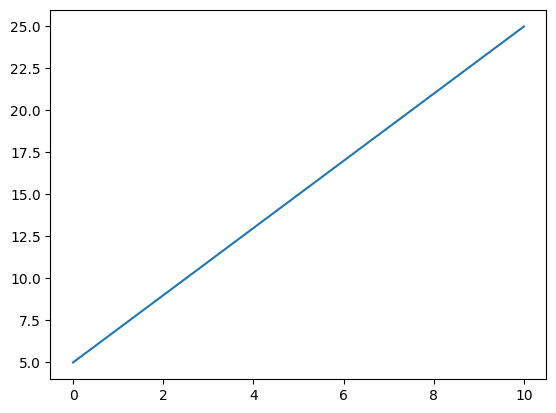

In [2]:
n_samples = 100  # Working with 100 samples
x = np.linspace(0, 10, n_samples)  # x coordinates; shape: (100,)
phi = np.stack([np.ones(n_samples), x], axis=-1)  # Φ matrix; shape: (100,2)
w_true = np.array([5, 2])  # weights; shape: (2,)
y_true =  phi @ w_true  # y coordinates with vector-matrix multiplication; shape: (100,)

plt.plot(x, y_true);  # plotting

We calculate the weights based on the formula described above:


In [3]:
w_est = np.linalg.inv(phi.T @ phi) @ phi.T @ y_true  # Determining weights based on the formula
w_est

array([5., 2.])

We can achieve the same using the built-in pseudo-inverse function:


In [4]:
w_est = np.linalg.pinv(phi) @ y_true  # Determining weights using pseudo-inverse
w_est

array([5., 2.])

We can see that in this simple case, we were able to precisely determine the parameters of the linear relationship.


Next, let's try to determine the parameters of the linear relationship based on noisy samples. To simulate this, let's add noise with a mean of 0 and a standard deviation of 1 to the data!

[```numpy.random.normal```](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

**Complete the code cells at the locations marked with ```#TODO``` with the appropriate details!**


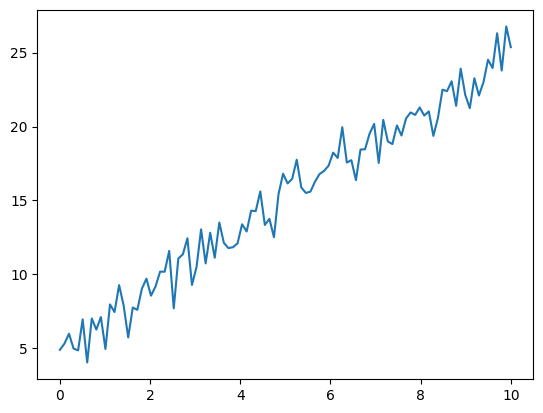

In [5]:
n_samples = 100
x = np.linspace(0, 10, n_samples)
phi = np.stack([np.ones(n_samples), x], axis=-1)
w_true = np.array([5, 2])
y_true =  phi @ w_true + np.random.normal(scale=1, size=n_samples)  # Generating y coordinates by adding noise
plt.plot(x, y_true);

In [6]:
w_est = np.linalg.pinv(phi) @ y_true
w_est

array([5.05253297, 1.99709747])

We can see that the parameters are approximately correct. Typically, the observation holds that the more (consistent) samples we have, the more accurate the estimation will be.


Let's plot the line based on the estimated parameters!


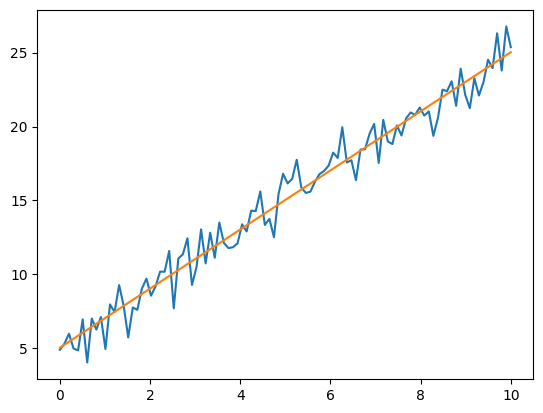

In [10]:
plt.plot(x, y_true)
plt.plot(x, phi @ w_est);  #TODO

We can also imagine the same task in 3 dimensions, where the samples are located on a 2-dimensional plane. This means we want to estimate a third feature based on two features.
Now let's mix noise with a standard deviation of 0.1 and a mean of 0 into the data!


In [11]:
n_samples = 100
n_features = 2
x = np.random.rand(n_samples, n_features)  # 2d input coordinates
phi = np.hstack([np.ones((n_samples, 1)), x])  # shape: (100,3)
w_true = np.array([5, 2, 3])
y_true =  phi @ w_true + np.random.normal(scale=0.1, size=n_samples)  # Output with noise

If the generation was successful, the following code will plot the generated samples and the plane.


In [13]:
# 3d visualization
fig = px.scatter_3d(x=x.T[0], y=x.T[1], z=y_true)
fig.update_traces(marker={'size': 2})
surface_x = np.linspace(0, 1, 10)
surface_y = np.linspace(0, 1, 10)
surface_z = w_true[0] + np.add.outer(surface_y * w_true[2], surface_x * w_true[1])
fig.add_trace(go.Surface(x=surface_x, y=surface_y, z=surface_z, showscale=False))
fig.show()

Let's estimate the parameters again using the pseudo-inverse!


In [14]:
w_est = np.linalg.pinv(phi) @ y_true
w_est

array([4.96098552, 2.01521852, 3.05012563])

Finally, let's look at a more realistic example: now we will have 10 input features. We divide our samples into two parts: training and test partitions. We check our estimate produced based on the training set against the test set. In regression, the quality of the estimate is usually characterized by the root mean squared error (RMSE).

${\displaystyle \operatorname {RMSE} = \sqrt{ {\frac {1}{n}}\sum _{i=1}^{n}\left(Y_{i}-{\hat {Y_{i}}}\right)^{2}.}}$


In [30]:
n_samples = 100  # 100 samples
n_features = 10  # 10 input features
train_data_rate = 0.8  # Splitting the data in 0.8-0.2 ratio

# Creating training data and partitioning
x = np.random.rand(n_samples, n_features)
n_train_samples = int(train_data_rate * n_samples)
n_test_samples = n_samples - n_train_samples
x_train = x[:n_train_samples]
x_test = x[-n_test_samples:]

# Creating Φ matrices
phi_train = np.hstack([np.ones((n_train_samples, 1)), x_train])  #TODO
phi_test = np.hstack([np.ones((n_test_samples, 1)), x_test])   #TODO

w_true = np.random.rand(1 + n_features)

noise_train = np.random.normal(0, 0.1, n_train_samples)
noise_test = np.random.normal(0, 0.1, n_test_samples)

# Creating noise-laden outputs
y_train_true = phi_train.dot(w_true) + noise_train
y_test_true =  phi_test.dot(w_true) + noise_test

w_true

array([0.4874024 , 0.08563272, 0.55180695, 0.3477451 , 0.27014643,
       0.76959365, 0.65406364, 0.34497252, 0.2410659 , 0.31982122,
       0.19475883])

Let's determine the optimal parameters!


In [31]:
w_est = np.linalg.pinv(phi_train) @ y_train_true
w_est

array([0.48269843, 0.0978787 , 0.57291694, 0.33541769, 0.3670391 ,
       0.78833262, 0.62657998, 0.32990067, 0.20136383, 0.35223778,
       0.12221334])

Determine the difference, also known as the error, between the expected output (```y_test_true```) and the estimated output (```y_test_est```). To do this, we first determine the estimated output on the test dataset.

In [33]:
y_test_est =  phi_test @ w_est

We can visualize the difference between the estimated and actual outputs on a graph.


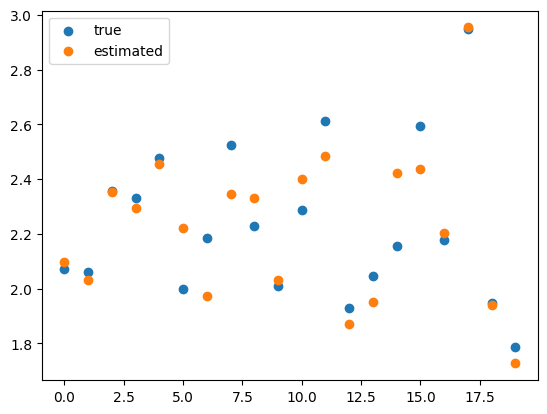

In [34]:
xs = np.arange(n_test_samples)
plt.scatter(xs, y_test_true.flatten(), label='true')
plt.scatter(xs, y_test_est.flatten(), label='estimated')
plt.legend();

To characterize the error, we perform an RMSE calculation (we can also say that we apply an RMSE loss function).


In [35]:
rmse = np.sqrt(np.mean((y_test_true - y_test_est) ** 2)) # TODO
print(f'root mean squared error: {rmse:.2f}')

root mean squared error: 0.12


Based on the result, we can see that we were able to provide a relatively good approximation for the expected output. (The value obtained here should be close to the **standard deviation of the added noise**.)


# **2. Binary Classification with Logistic Regression**

In logistic regression, we have two classes and assume that they are linearly separable, meaning they are located on either side of a hyperplane. Using the tools of probability theory and making certain simplifications, we arrive at the following expression (it's worth reading the [Machine Learning course notes](https://github.com/bolgarbe/gtjegyzet/blob/main/book.pdf)):

$\displaystyle \hat{y} = p(y=1|x) = \frac{1}{
  1 + \exp (- ( \mathbf{w}^\mathsf{T}\phi(\mathbf{x}) ))
  } = \sigma(\mathbf{w}^\mathsf{T}\phi(\mathbf{x}))$

$1 - \hat{y} = p(y=0|x) = 1 - \sigma(\mathbf{w}^\mathsf{T}\phi(\mathbf{x}))$,

where
- $y$ is a scalar, which can be either 0 (sample belonging to one class) or 1 (sample belonging to the other class)
- $\mathbf{x} \in \mathbb {R} ^{n}$ is the input vector containing values for attributes
- $\mathbf{w} \in \mathbb {R} ^{n}$ is the vector containing weights for each attribute (which we seek)
- the $\phi$ function is still used to "hide" the bias
- $\sigma(a) =  \frac{1}{1 + e^{-a}}$ is the sigmoid function, with a range of (0; 1)


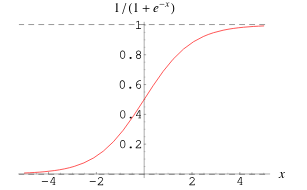

Therefore, the output ($\hat{y}$) indicates the probability of a sample belonging to class 0 or class 1.

We again look for the optimal value of $\mathbf{w}$ using the maximum likelihood method, which does not yield a closed-form solution this time, but we do obtain a loss function (binary cross-entropy) that we need to minimize:

$ L(\mathbf{w})\ =\ -\sum _{i} y_i\log {\hat {y_i}}-(1-y_i)\log(1-{\hat {y_i}})$

We can minimize this using various methods, such as the gradient descent method (gradient descent - ```/ˈɡreɪ.di.ənt dɪˈsent/```). The essence of this is to iteratively modify $\mathbf{w}$ by taking small steps in the opposite direction of the gradient of $L$ with respect to $\mathbf{w}$. Although the surface of our loss function is typically multi-dimensional and much more complex, the following diagram illustrates the process well:


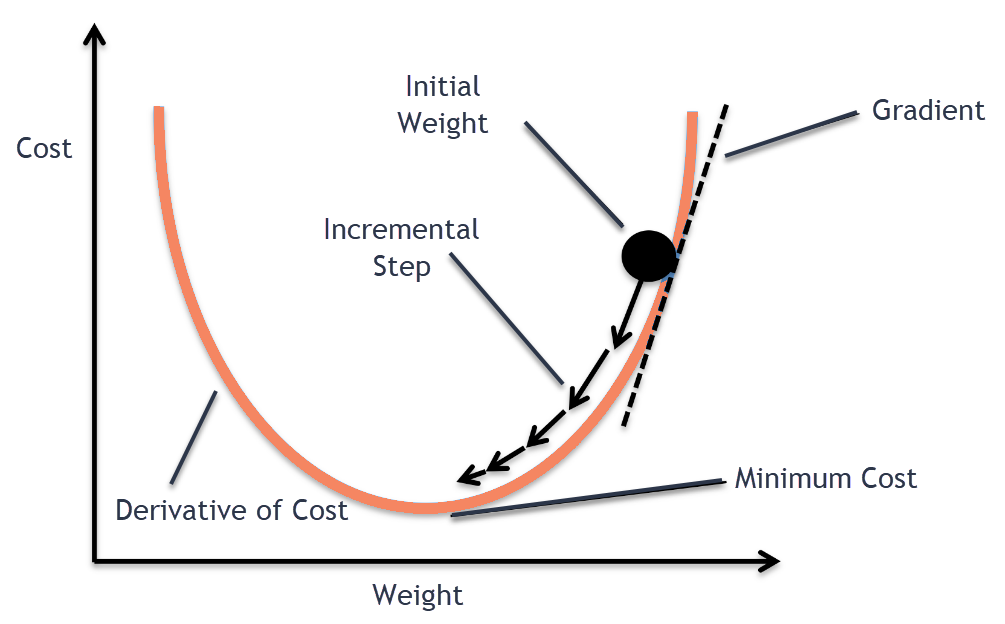


If we take the gradient of $L$ with respect to $w$, we get the following relationship:
$∇_\mathbf{w} L = -\sum_i(y_i - \hat y_i)ϕ_i$

Thus, we can iteratively update the values of the $w$ weight vector:

$\mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla_\mathbf{w}L$

Here $\\alpha$ is the update magnitude (learning rate), i.e., how big a step we take in the direction opposite to the gradient. If we take a step too large, we might repeatedly "overshoot" the minimum point. If we take a step too small, the training takes a long time. There are several strategies for setting this, in the form of various optimizers (ADAM, RMSProp, Momentum, simulated annealing, etc.). For this simple task, we will use a manually set value.

For efficient execution, the update is performed in a vectorized manner. To do this, we write the gradient in matrix form:

$∇_\mathbf{w} L = -\Phi^\mathsf{T}(\mathbf{y} - \hat{\mathbf{y}})$,
where $ \hat{\mathbf{y}} = \sigma(\mathbf{\Phi w})$


By running the following cell, we will delete the variables from the previous task and import the necessary libraries.


In [36]:
%reset -sf

import numpy as np
import matplotlib.pyplot as plt

The training samples will appear as shown in the diagram.


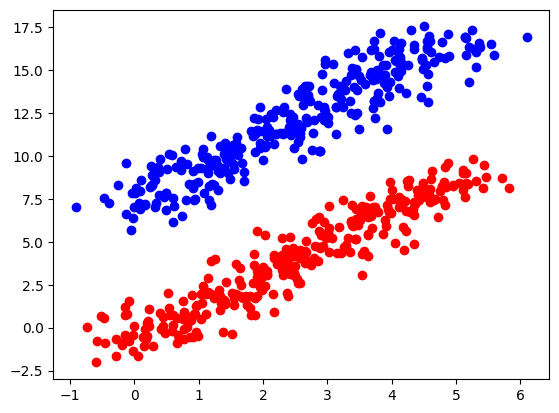

The points are located in two clusters (0 - blue and 1 - red) and are linearly separable.

The points of class 0 are located along the line defined by the equation $x_2 = 2 \cdot x_1+7$, where $0 < x_1 <  5$.

The points of class 1 are located along the line defined by the equation $x_2 = 2 \cdot x_1-1$, where $0 < x_1 <  5$.

Each class consists of 300 elements.
Also, add noise with a mean of $0$ and a standard deviation of $0.5$, normally distributed!


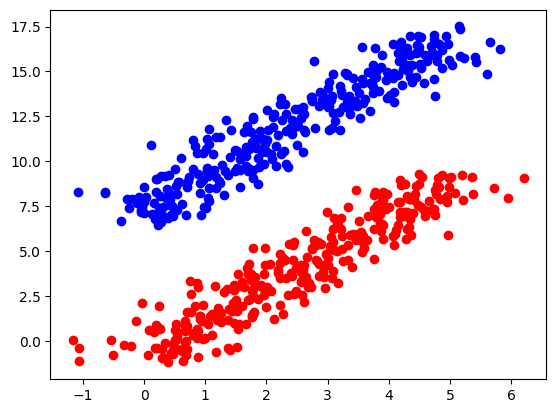

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# --- Generating Input Samples ---
n_samples = 600  # We work based on 600 samples
n_samples_0 = n_samples // 2  # Half of them belong to class 0
n_samples_1 = n_samples - n_samples_0  # The other half belong to class 1

# Samples of class "0" (blue): 0<x1<5; x2=2⋅x1+7
class_0_x1 = np.linspace(0, 5, n_samples_0)  # 0<x1<5; shape: (300,)
class_0_x2 = 2 * class_0_x1 + 7  # shape: (300,)
class_0 = np.column_stack((class_0_x1, class_0_x2))  # x1 and x2 next to each other; shape: (300, 2)

# Samples of class "1" (red): 0<x1<5; x2=2⋅x1−1
class_1_x1 = np.linspace(0, 5, n_samples_1)  # 0<x1<5; shape: (300,)
class_1_x2 = 2 * class_1_x1 - 1  # shape: (300,)
class_1 = np.column_stack((class_1_x1, class_1_x2))  # x1 and x2 next to each other; shape: (300, 2)

# Concatenating input data
inputs_without_noise = np.row_stack((class_0, class_1))  # shape: (600, 2)

# Adding noise
noise = np.random.normal(0, 0.5, inputs_without_noise.shape)  # noise with mean 0 and std 0.1
inputs = inputs_without_noise + noise  # shape: (600, 2)

# --- Generating Labels ---
label_0 = np.repeat(0.0, n_samples_0)  # Creating 0 labels; shape: (300,)
label_1 = np.repeat(1.0, n_samples_1)  # Creating 1 labels; shape: (300,)

# Concatenating labels
labels = np.concatenate((label_0, label_1))  # shape: (600,)

# Plotting
for i in range(n_samples):
    marker = 'bo' if labels[i] == 0.0 else 'ro'
    plt.plot(inputs[i, 0], inputs[i, 1], marker)
plt.show()


In the following, we define two helper functions.

- one is the sigmoid function itself, where it is worth separating two cases to avoid numerical instability: $x \geq 0$ and $x < 0$
- the other function will visualize the state during the learning process


In [40]:
def sigmoid(x):
    positive = x >= 0
    negative = ~positive

    result = np.empty_like(x)
    result[positive] = 1 / (1 + np.exp(-(x[positive])))
    exp = np.exp(x[negative])
    result[negative] = exp / (exp + 1)

    return result

def plot_regression_state(inputs, w_est):
  n_samples = inputs.shape[0]
  grid_x1 = np.linspace(inputs[:, 0].min(), inputs[:, 0].max(), 100)
  grid_x2 = np.linspace(inputs[:, 1].min(), inputs[:, 1].max(), 100)
  x1s, x2s = np.meshgrid(grid_x1, grid_x2)
  zs = sigmoid(w_est[0] + w_est[1] * x1s + w_est[2] * x2s)
  plt.contourf(x1s, x2s, zs, 21, cmap='jet',  vmin=0, vmax=1)
  for i in range(n_samples):
      marker = 'bo' if labels[i] == 0.0 else 'ro'
      plt.plot(inputs[i,0], inputs[i,1], marker)
  plt.colorbar();
  plt.show()

Let's generate the Φ matrix again!


In [41]:
phi = np.hstack([np.ones((n_samples, 1)), inputs])
phi

array([[1.        , 0.27860561, 6.6066259 ],
       [1.        , 0.45238226, 7.50189459],
       [1.        , 0.92694558, 7.02742776],
       ...,
       [1.        , 5.71787737, 8.48512767],
       [1.        , 6.21061548, 9.09183573],
       [1.        , 4.54502466, 9.1235137 ]])

Thus, the update of the weights occurs as follows:

$\mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla_\mathbf{w}L = \mathbf{w} - \alpha (-\Phi^\mathsf{T}(\mathbf{y} - \sigma(\mathbf{\Phi w}))$

In order to avoid taking too large steps, divide the gradient by the number of samples. The variables represent the following components:

- ```y_hat```: $\sigma(\mathbf{\Phi w})$

- ```diff```: $\mathbf{y} -$ ```y_hat```
- ```grad```: $\nabla_\mathbf{w}L$


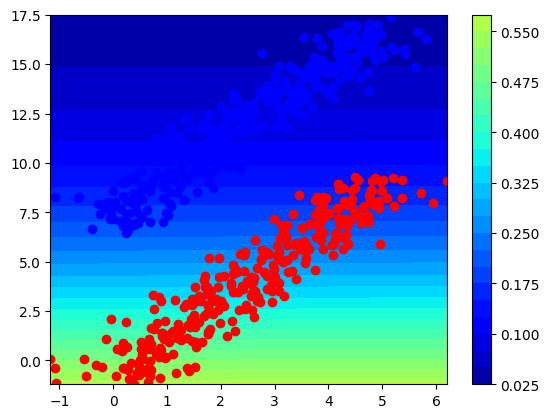

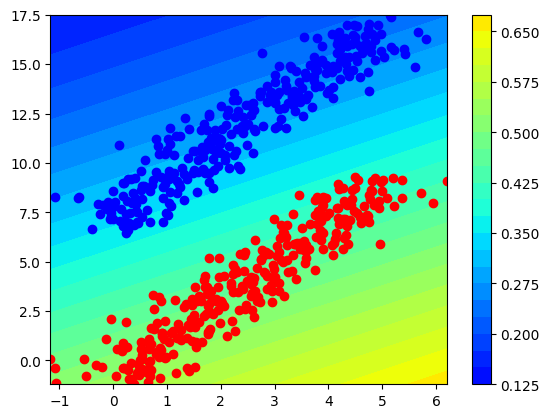

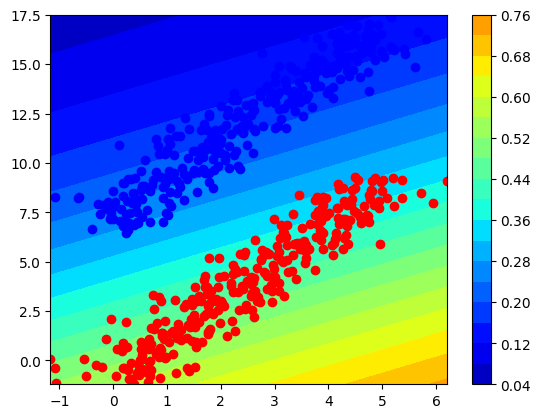

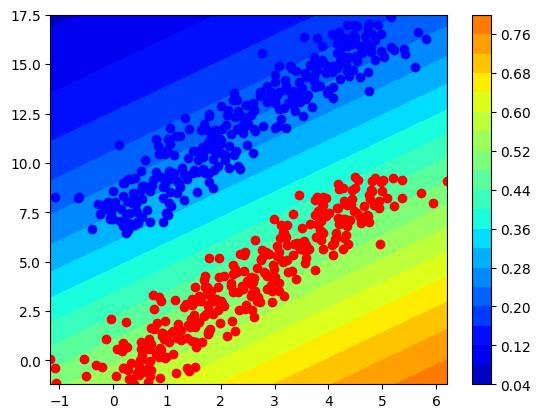

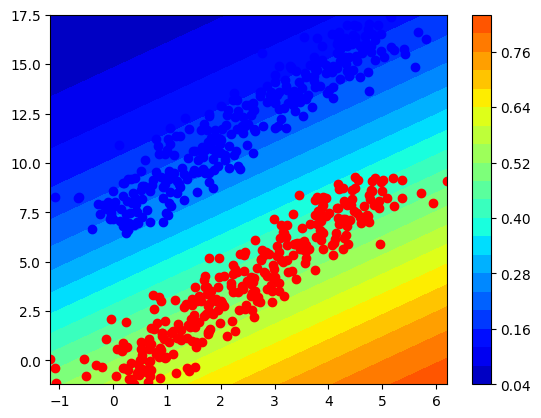

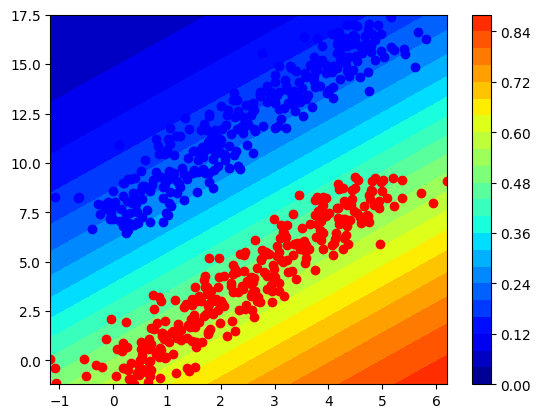

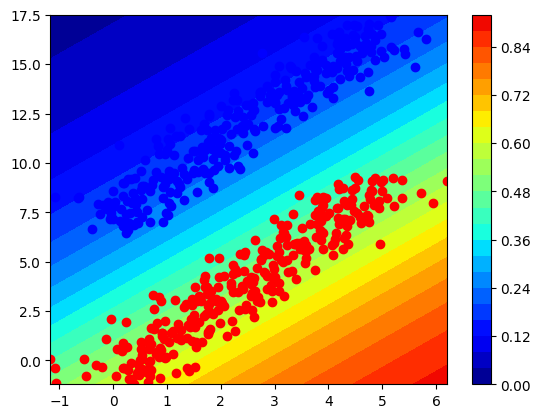

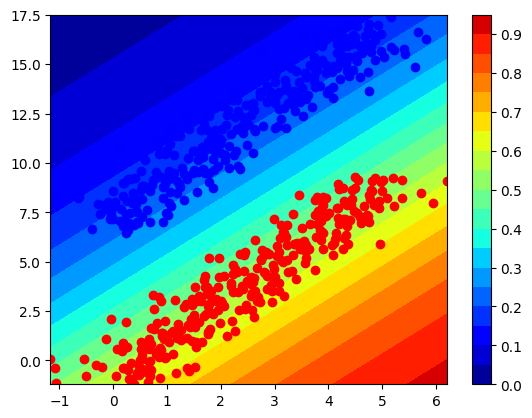

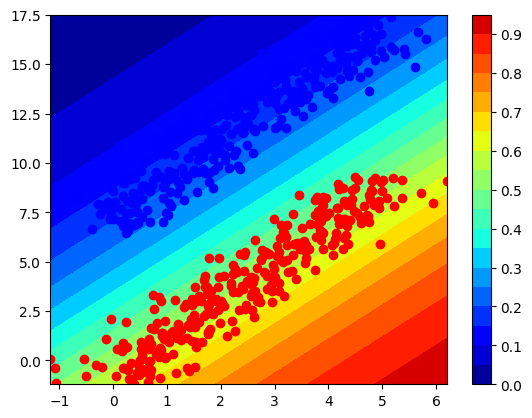

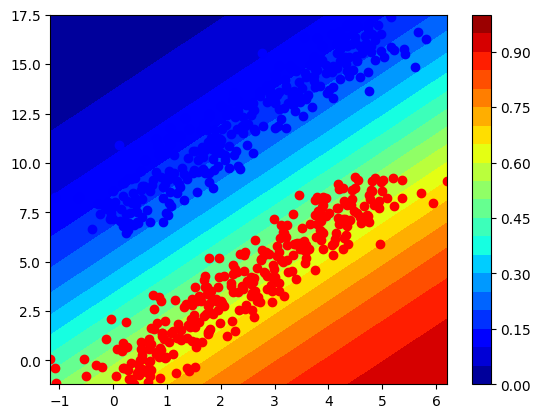

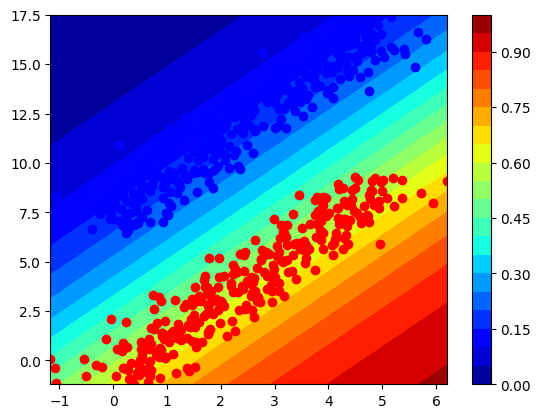

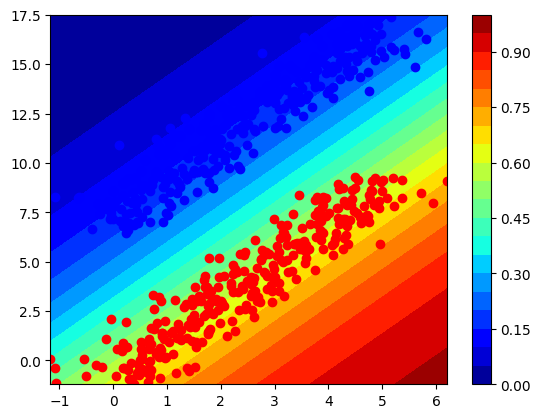

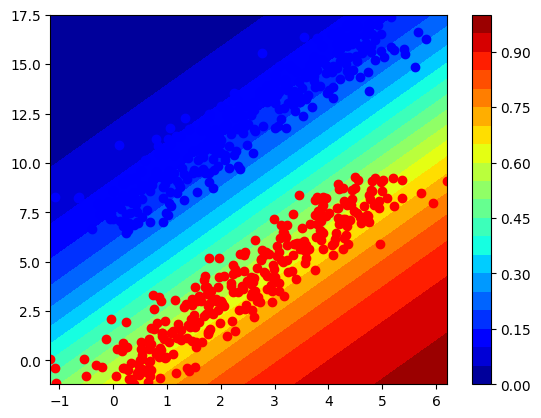

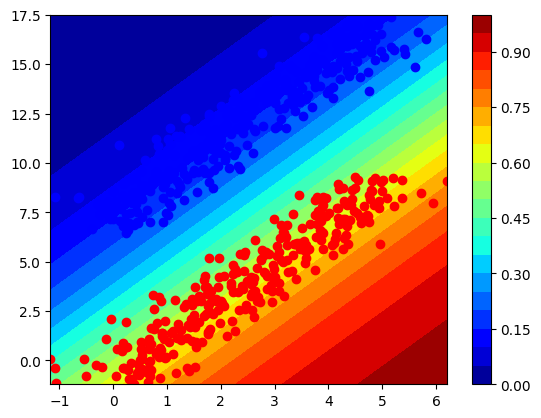

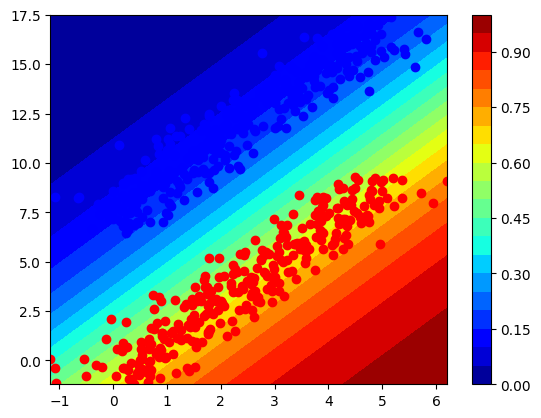

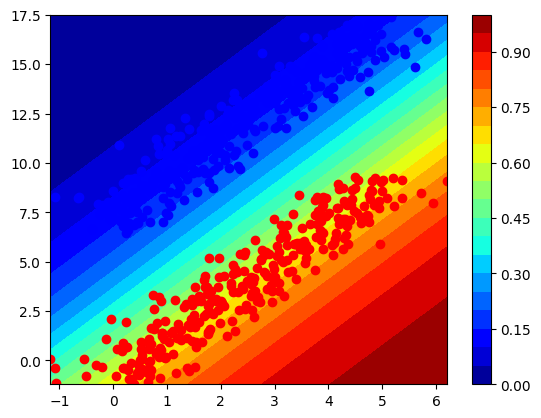

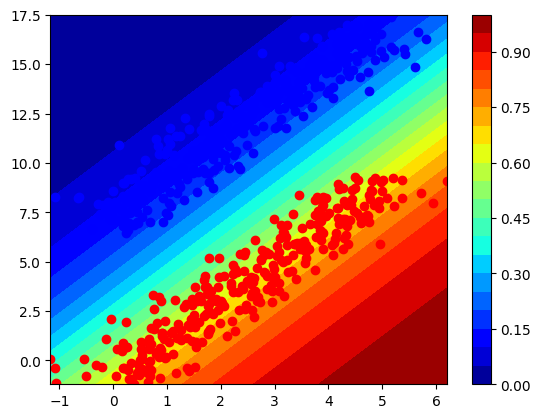

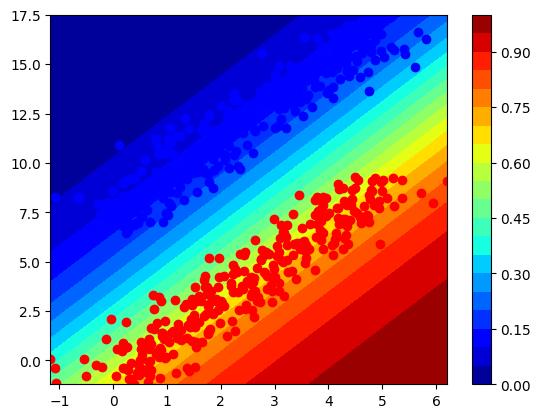

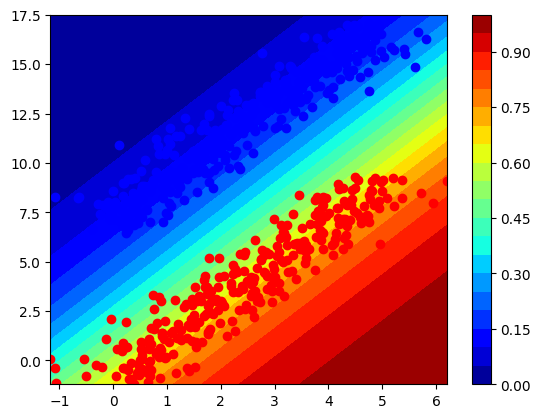

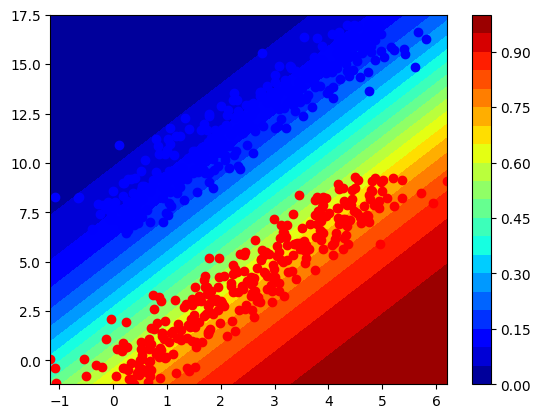

[ 0.26558302  0.68874896 -0.32803848]


In [43]:
w_est = np.zeros(3)
learning_rate = 0.1

for _ in range(20):
  y_hat =  sigmoid(phi @ w_est)
  diff =  labels - y_hat
  grad =  -phi.T @ diff
  w_est = w_est - learning_rate * grad / n_samples
  plot_regression_state(inputs, w_est)

print(w_est)

The plot clearly shows the effect of iterative weight updates. (The threshold is around 0.5, the corresponding colors below it belong to the blue class, and those above it belong to the red class.)


# **3. Neural Networks**

Generalizing logistic regression as previously learned, we can arrive at neural networks. The prediction during logistic regression occurred based on the following relationship:

$\displaystyle \hat{y} = p(y=1|x) = \sigma(\mathbf{w}^\mathsf{T}\phi(\mathbf{x}))$

We first transformed the input vector $\mathbf{x}$ (added the bias component), then took the weighted sum of its components and applied the sigmoid function.



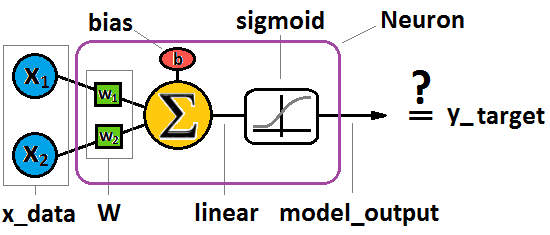

This can be generalized to obtain the building blocks of neural networks, the neurons:
- $\mathbf{x}$ will be the neuron's input
- a bias component is always added to this
- it takes the weighted sum of these modified input components (it is these weights that need to be learned)
- finally, it applies some kind of nonlinear $f$ function to it (which could be sigmoid), called the **activation function**.

Thus, the $\displaystyle \hat{y} = f(\mathbf{w}^\mathsf{T}\phi(\mathbf{x}))$ relationship will determine the output of a neuron (where $\phi$ just adds a component with a value of 1 to the input because of the bias). The choice of the $f$ activation function depends on the task to be solved and the neuron's placement within the architecture.


We organize elementary neurons into layers. Each neuron in a given layer receives the output of the previous layer as input:


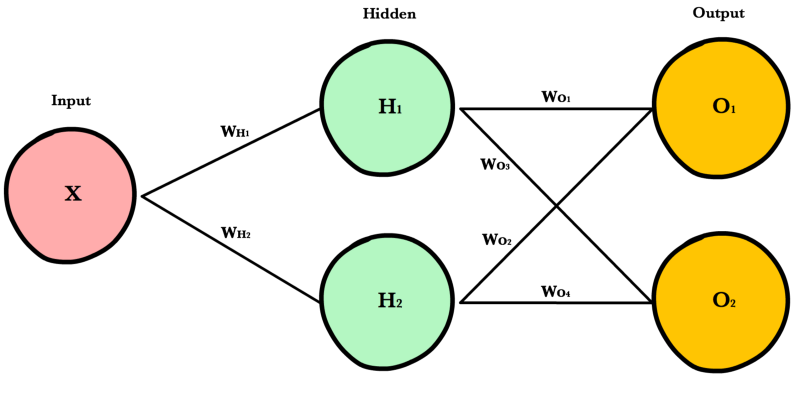

We distinguish between input (first), output (last), and hidden (in between the two) layers. The diagram shows one hidden layer, but there can be (much) more (traditionally, more than 3 layers are considered deep neural networks, but modern deep neural networks can have several hundred layers).

The activation function of neurons in a given layer is the same. There are several types of activation functions. Below we list some typical types:


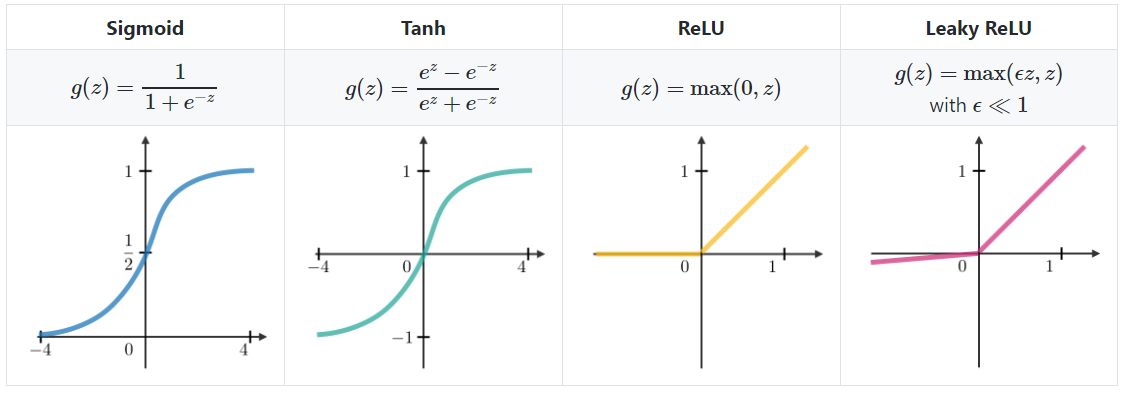

For example, in classification problems, we typically use sigmoid (or softmax, not listed here) in the output layer, and ReLU in the other layers.

In regression problems, we typically omit the activation function from the last layer (linear activation).


The table below shows a good rule of thumb for how to set certain properties of the neural network depending on the task.


| **Task Type**                          | **Number of Neurons in Last Layer** | **Activation in Hidden Layer(s)** | **Activation in Output Layer** | **Loss Function**                |
|----------------------------------------|-------------------------------------|-----------------------------------|--------------------------------|----------------------------------|
| binary classification                  | 1                                   | ReLU                              | sigmoid                         | binary cross-entropy             |
| multi-class, single-label classification | number equal to classes            | ReLU                              | softmax                         | categorical cross-entropy        |
| multi-class, multi-label classification | number equal to classes            | ReLU                              | sigmoid (separate for each class)| binary cross-entropy             |
| regression to arbitrary values        | 1                                   | ReLU                              | -                               | MSE                              |
| regression to values between 0 and 1  | 1                                   | ReLU                              | sigmoid                         | MSE/binary cross-entropy         |


We obtain the output of neural networks by sequentially evaluating the layers (the neurons in them). This is known as forward propagation. For more details, it's worth reading further [here](https://ml-cheatsheet.readthedocs.io/en/latest/forwardpropagation.html#simple-network).


Neural networks are trained using the gradient descent method, similar to logistic regression. This is often referred to as backpropagation. The training is done with (input; expected output) pairs. Based on the input, we calculate the expected output (forward propagation). Then, with a predefined loss function, we can calculate the error between the obtained and the expected output. The learning process consists of calculating the gradient of the loss function according to the weight of each neuron and modifying the weight vectors with this gradient vector. In this way, we try to minimize the value of the loss function. A more detailed description can be found [here](https://ml-cheatsheet.readthedocs.io/en/latest/backpropagation.html) (this is a must-read). In the description, the loss function is denoted by $C$ (cost function).


So far, we have dealt with linear regression and linearly separable classification problems. These tasks can be solved with a single neuron, as we saw in the previous task.
However, not all classification tasks are linearly separable. In two dimensions, this means that a straight line is not always sufficient to separate our data points (and the same is true for hyperplanes in more dimensions). In such cases, more complex models are needed that can fit appropriate curves around our data points. In the following tasks, we will encounter problems that are obviously not solvable with the previous model.


-----------------------------

#**4. TensorFlow**#
TensorFlow is an open-source library for machine learning that we will use for building, training, and evaluating models. Its strengths are that:
- it takes advantage of the fact that the computations of neural networks can be parallelized, which can achieve significant acceleration, especially if we run the computations on a GPU
- when creating a neural network, it builds a computational graph, based on which it automatically calculates the gradient, so we do not have to calculate it ourselves (even if we write some calculation ourselves - provided we used tf functions)


In [1]:
%reset -sf

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# check TF version
print(tf.__version__)

2.17.1


## 4.1 TensorFlow-based Implementation of the Previous Binary Separation Task ##

In the first task, we encounter a linearly separable binary classification task similar to the one introduced in the beginning.
After generating and visualizing the dataset, we will solve the problem by training a neuron.
During the task, observe the behavior of the training algorithm in terms of convergence speed and accuracy!


Run the following code snippet to later easily visualize the predictions of models on 2D data.


In [3]:
def plot_grid_of_model(model, inputs, labels):
  # Creating a grid for illustrating the decision surface
  # Extent along the axes
  x_min = inputs[:, 0].min() - 0.2;
  x_max = inputs[:, 0].max() + 0.2;
  y_min = inputs[:, 1].min() - 0.2;
  y_max = inputs[:, 1].max() + 0.2;

  h = (x_max - x_min)/50.0  # Distance between grid points
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  grid_points = np.c_[xx.ravel(), yy.ravel()]

  # Classifying grid cells using the model passed as a parameter
  grid_predictions = model.predict(grid_points)
  grid_predictions_drawing = grid_predictions.reshape(xx.shape)

  # Initializing the figure
  # fig1, ax2 = plt.subplots(constrained_layout=True)
  fig1, ax2 = plt.subplots()

  # Drawing the training samples
  for i in range(len(labels)):
      if(labels[i] == 1.0):
          ax2.plot(inputs[i,0], inputs[i,1], 'ro')
      else:
          ax2.plot(inputs[i,0], inputs[i,1], 'bo')

  # Drawing the grid cells based on the above classification
  CS = ax2.contourf(xx, yy, grid_predictions_drawing,
                11,  cmap='jet',
                alpha=0.5, vmin=0, vmax=1)

  # Drawing the separating curve
  CS2 = ax2.contour(CS, levels=[0.5], colors='g')
  cbar = fig1.colorbar(CS)
  cbar.add_lines(CS2)

## 4.2 Splitting into Training, Validation, and Test Datasets ##

We can measure the performance of a neural network model in several ways. One important expectation from the model is that it should not only perform well on the input samples it was trained on but also on those it has not encountered during training. This property is called **generalization ability**. The phenomenon where the model performs well only on the training samples is known as **overfitting**. Several methods can be applied to retain generalization ability. One basic approach is to divide our available samples, i.e., the dataset, into 3 parts: (1) **training dataset**, (2) **validation dataset**, and (3) **test dataset**. We use the samples from the training dataset as input during the model training. The validation dataset is a measure of how the model performs on a dataset that it was not trained on. During the iterations of training, we also evaluate the model on the validation dataset (along with the training dataset), and when the performance on the validation dataset starts to deteriorate, we stop the training. Finally, the test dataset is used as a completely independent dataset to evaluate the model and assess its generalization ability.

There are numerous other possibilities to ensure generalization capability, such as imposing constraints on the parameters or structure of the neural network. One simple method from the latter is the application of **dropout**, which means that during training, certain neurons are omitted with a given probability as if they were not present in the network. This encourages the neural network to learn those elements that are most important.


## 4.3 Creation of Training Set

Copy the code for generating the dataset from the [previous task](#scrollTo=QylXmVTATz3a&line=5&uniqifier=1)!


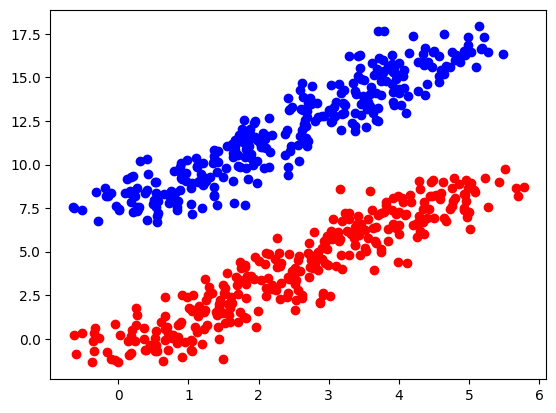

(600, 2)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- Generating Input Samples ---
n_samples = 600  # We work based on 600 samples
n_samples_0 = n_samples // 2  # Half of them belong to class 0
n_samples_1 = n_samples - n_samples_0  # The other half belong to class 1

# Samples of class "0" (blue): 0<x1<5; x2=2⋅x1+7
class_0_x1 = np.linspace(0, 5, n_samples_0)  # 0<x1<5; shape: (300,)
class_0_x2 = 2 * class_0_x1 + 7  # shape: (300,)
class_0 = np.column_stack((class_0_x1, class_0_x2))  # x1 and x2 next to each other; shape: (300, 2)

# Samples of class "1" (red): 0<x1<5; x2=2⋅x1−1
class_1_x1 = np.linspace(0, 5, n_samples_1)  # 0<x1<5; shape: (300,)
class_1_x2 = 2 * class_1_x1 - 1  # shape: (300,)
class_1 = np.column_stack((class_1_x1, class_1_x2))  # x1 and x2 next to each other; shape: (300, 2)

# Concatenating input data
inputs_without_noise = np.row_stack((class_0, class_1))  # shape: (600, 2)

# Adding noise
noise = np.random.normal(0, 0.5, inputs_without_noise.shape)  # noise with mean 0 and std 0.1
inputs = inputs_without_noise + noise  # shape: (600, 2)

# --- Generating Labels ---
label_0 = np.repeat(0.0, n_samples_0)  # Creating 0 labels; shape: (300,)
label_1 = np.repeat(1.0, n_samples_1)  # Creating 1 labels; shape: (300,)

# Concatenating labels
labels = np.concatenate((label_0, label_1))  # shape: (600,)

# Plotting
for i in range(n_samples):
    marker = 'bo' if labels[i] == 0.0 else 'ro'
    plt.plot(inputs[i, 0], inputs[i, 1], marker)
plt.show()


###**4.4 Check Questions**###
We use the `shape` attribute of the input matrix to query its size.


In [ ]:
You need to create the random vectors

Why is the matrix of this size (why is the size of the 1st dimension and the 2nd dimension such)?


```
# TODO:
1: 600 hundersd
2: points 2 [x,y]
```

What values are contained in the labeling (`labels`)?



```
# TODO:
The outputs class 0 300 zeros class 1 300 1 = 600
```

In [6]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

What is the size of the vector containing the labels? Let's print it!


In [7]:
  # TODO

  labels.size

600

## 4.5 Creating a Neuron

Now that the dataset is ready, let's continue with the creation of a neuron. We will implement this in this task with a single-layer neural network, which contains only one neuron in its layer.

Using the `tf.keras.Sequential` API, we can easily create simple neural networks as follows:

```
# creating a sequential network
model = tf.keras.Sequential()

# adding a fully connected layer with 4 neurons, with sigmoid activation:
model.add(tf.keras.layers.Dense(4, activation="sigmoid"))

# finalizing the model by specifying the input batch size
# here, None denotes the dimension where individual samples are listed, and 2 is the size of a sample
# we will work with the same size in the task
model.build((None, 2))

# compiling the model
model.compile(...)
```

**Task:**
- Create a neural network using the [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) class!
- The network should have one [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layer, which contains exactly 1 neuron!
- Apply [Sigmoid](https://www.tensorflow.org/api_docs/python/tf/kerags/activations/sigmoid) activation function!

In [9]:
# -- TODO --
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.build((None, 2))
# -- TODO --

# compiling
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

If everything is correct, after printing the summary of the model, we see that the network has three trainable parameters. According to the previously used notation, these are the w_1, w_2, and b parameters.

<center><img src="https://i.ibb.co/8g5kd39/09-pic.png" width="350"></center>

As we have seen before, these parameters are closely related to the separating line. What is this relationship?

**Task:**
- Try to find $w_1$, $w_2$, $b$ parameters (through iterative trial and error, or calculation) that allow the network to classify the points of the dataset correctly (excluding maybe 1-2 points)!


232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


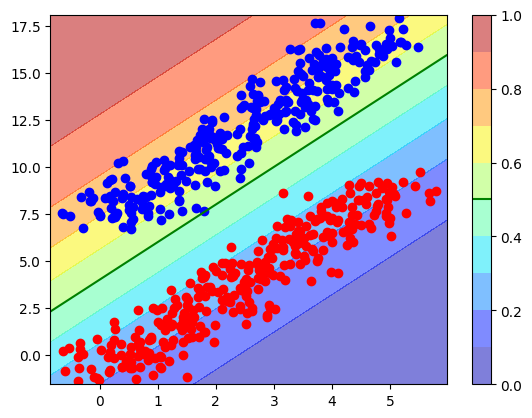

In [23]:
w_1 = -0.5  # TODO
w_2 = 0.25  # TODO
b = -1  # TODO

model.layers[0].set_weights((np.array([[w_1], [w_2]]), np.array([b])))

plot_grid_of_model(model, inputs, labels)
plt.show()

If you have found suitable parameters, let's see how this can be achieved with an iterative training algorithm from a similar initial configuration ($w_1=0.0, w_2=-0.5, b=0.5$)!

**Task:**
- Look up the [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method of the [Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model) class! This method allows us to train the neural network with input-output pairs. We will only use the first 2 parameters, which will be matrices containing the input and labels, respectively.
- Complete the following code snippet with the training step and observe the training process with the help of diagrams!
- If you feel it necessary, increase (or decrease) the value of the _num_epochs_ variable! This value determines how many times the neural network will see the data samples during learning. It is expected that if it sees them more times, it will perform better.


232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


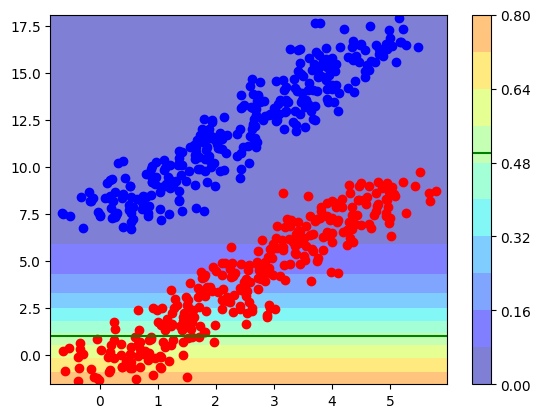

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6112 - loss: 0.8487  
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


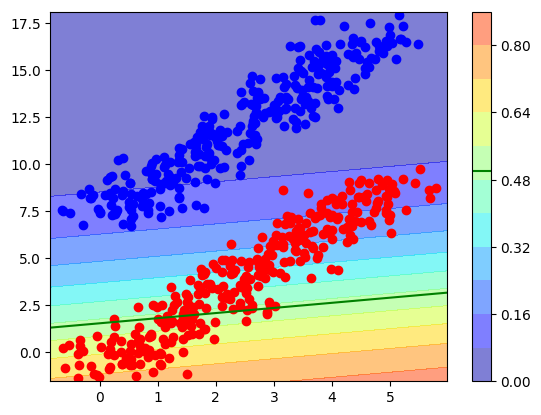

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6577 - loss: 0.5476 
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


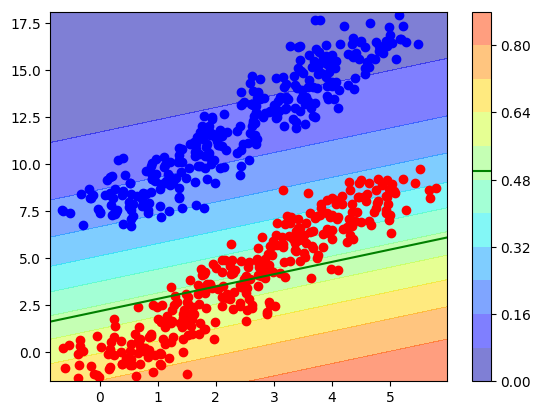

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7688 - loss: 0.4158 
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


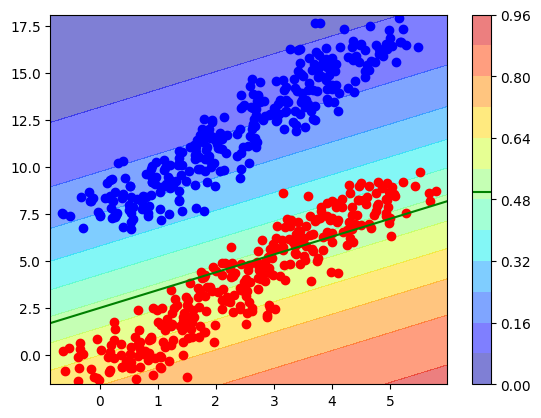

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8505 - loss: 0.4018 
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


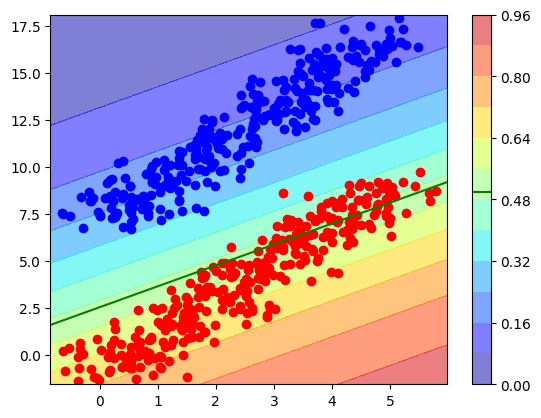

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9079 - loss: 0.3865 
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


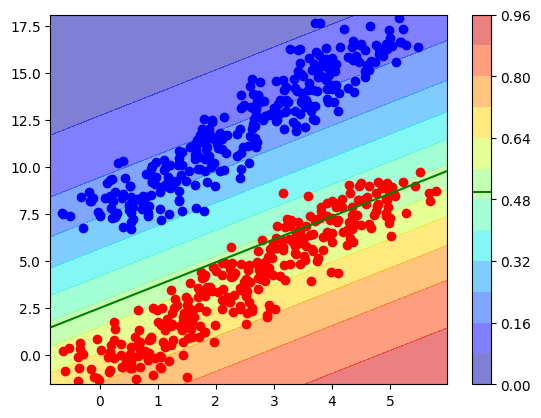

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9415 - loss: 0.3633 
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


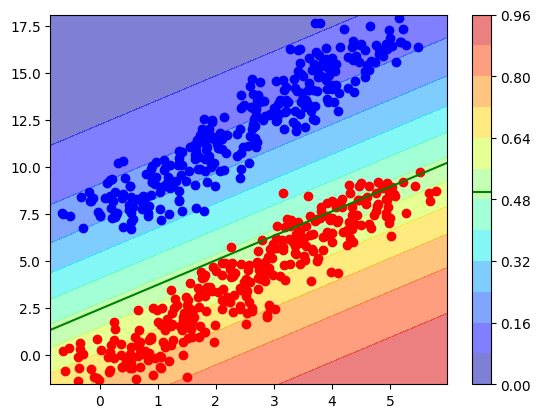

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9592 - loss: 0.3599 
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


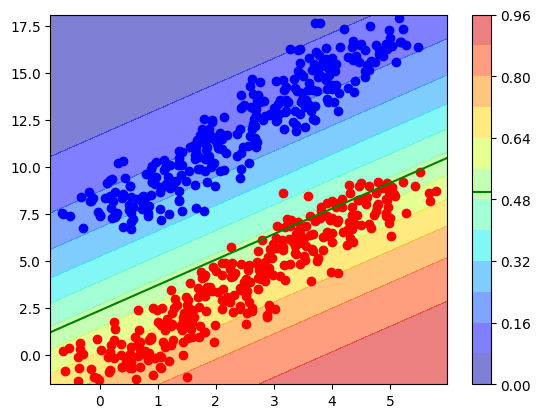

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9607 - loss: 0.3376 
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


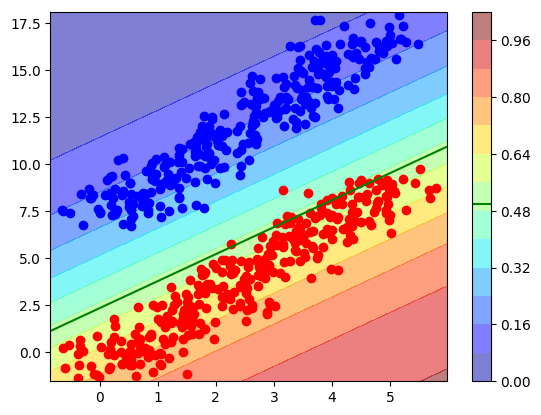

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9771 - loss: 0.3267 
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


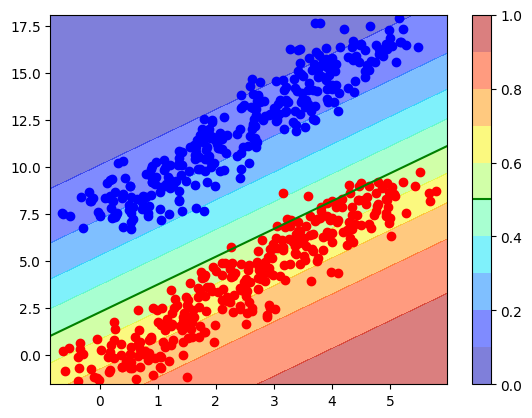

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9956 - loss: 0.3267 
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


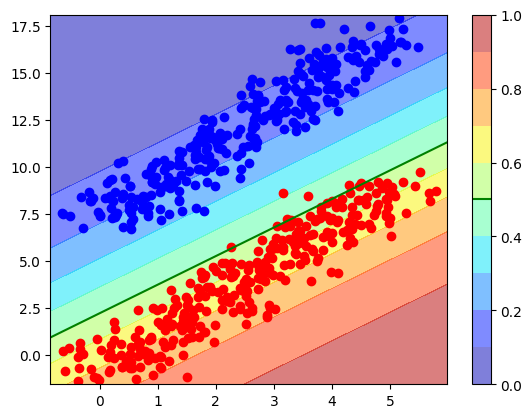

In [16]:
model.layers[0].set_weights((np.array([[0.0], [-0.5]]), np.array([0.5])))

plot_grid_of_model(model, inputs, labels)
plt.show()

"""
num_epochs: The number of times we allow the algorithm to go through the entire dataset during training.
In this task, do not use the similarly named parameter of fit()!
"""
num_epochs = 10
for i in range(num_epochs):
  model.fit(x=inputs, y=labels)
  plot_grid_of_model(model, inputs, labels)
  plt.show()

If we are satisfied with the result, let's look at the parameters obtained after optimization. Is there a relationship between these and the parameters we set manually?


In [17]:
(w_1, w_2), b = model.layers[0].get_weights()
print(f'w_1 = {w_1.item():.2f}')
print(f'w_2 = {w_2.item():.2f}')
print(f'b = {b.item():.2f}')

w_1 = 0.44
w_2 = -0.29
b = 0.64


# **5. Classification with a Neural Network**


## 5.1 Creation of Training Set

Let's start the task again with the creation of the dataset!

Our dataset will now look similar to the following figure:

<center><img src="https://i.ibb.co/jwBPwKp/11-pic.png" width="350"></center>

We will assign the labels so that the blue points are labeled 0, and the red ones are labeled 1.

**Task:**
- Specify the labels for the red (class 1) points!


(250, 1)


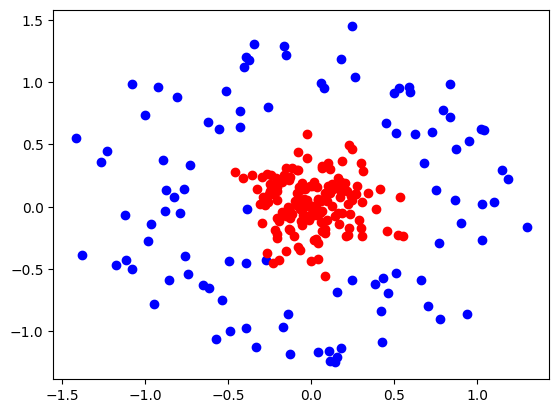

In [29]:
  # parameters
num_samples = 5*50
variance = 0.22

# samples
x = np.linspace(0, 6.26, 2*num_samples//5)
class_0_x1 = np.cos(x)
class_0_x2 = np.sin(x)
class_0 = np.column_stack((class_0_x1, class_0_x2))

class_1 = np.repeat([0.0, 0.0], 3*num_samples//5).reshape(-1, 2)


inputs = np.row_stack((class_0, class_1))

# perturbation of samples with normal i.i.d noise
noise = np.random.normal([0.0, 0.0], variance, [num_samples, 2])
inputs = inputs + noise

# class labels
label_0 = np.repeat(0.0, 2*num_samples//5)  # 2/5 of the samples are class 0 (blue)
label_1 = np.repeat(1.0, 3*num_samples//5)  # 3/5 of the samples are class 1 (red) #TODO

labels = np.concatenate((label_0, label_1))
labels = np.expand_dims(labels, 1)
print(labels.shape)

# displaying the training samples
for i in range(num_samples):
    marker = 'bo' if labels[i] == 0.0 else 'ro'
    plt.plot(inputs[i, 0], inputs[i, 1], marker)
plt.show()

## Creating the model and training
First, let's try to solve the task with the network seen in the previous task!

**Task:**
- Create a model similar to the previous one (1 layer, 1 neuron, sigmoid activation)
- Similarly to before, complete the training loop with the training step, then run the cell!
- We are no longer interested in the diagram after every step. Increase the _epochs_ parameter of the _fit()_ function!
- What do you observe? What do you think is the reason for this?


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


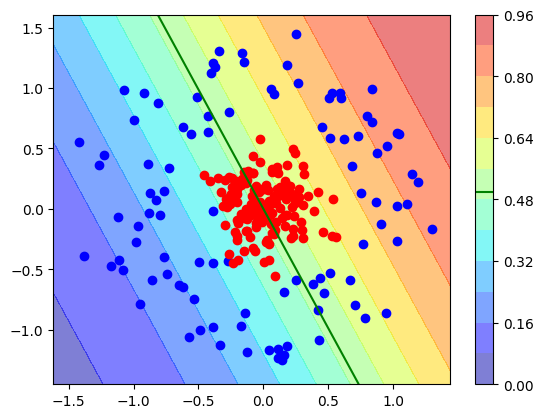

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5038 - loss: 0.7274  
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


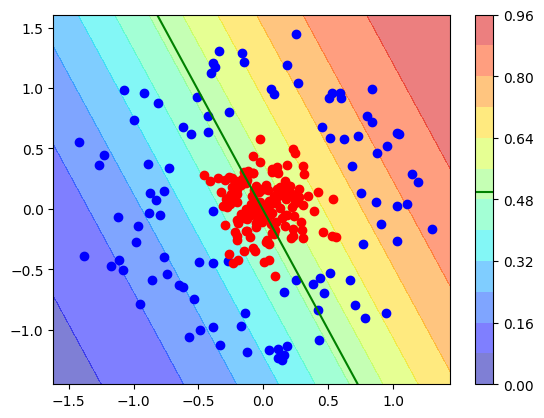

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4788 - loss: 0.7410 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


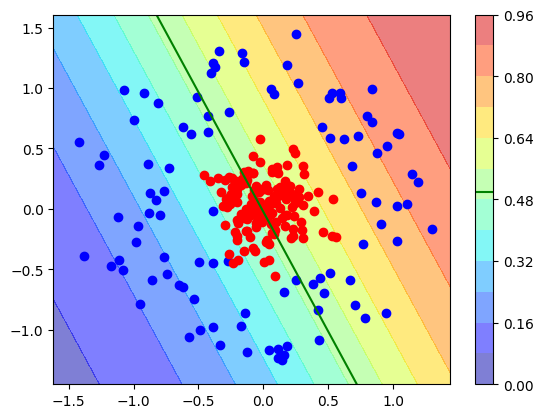

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5641 - loss: 0.7080 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


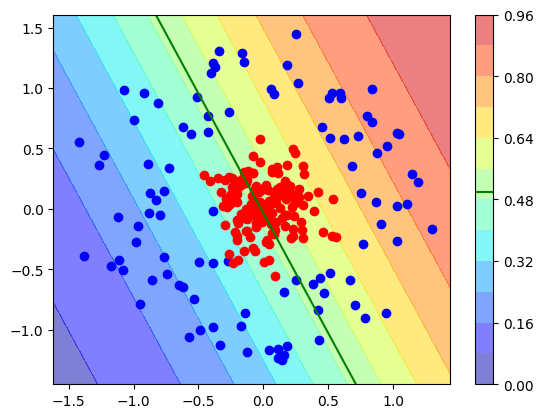

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5290 - loss: 0.7347 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


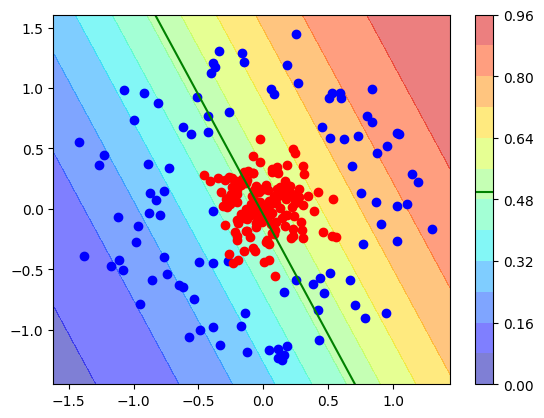

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5809 - loss: 0.7147 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


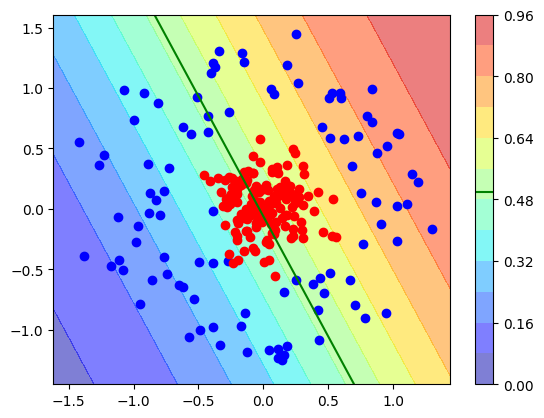

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5763 - loss: 0.7234 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


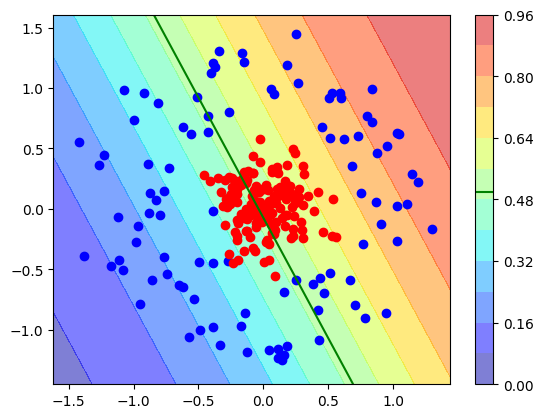

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5880 - loss: 0.7208 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


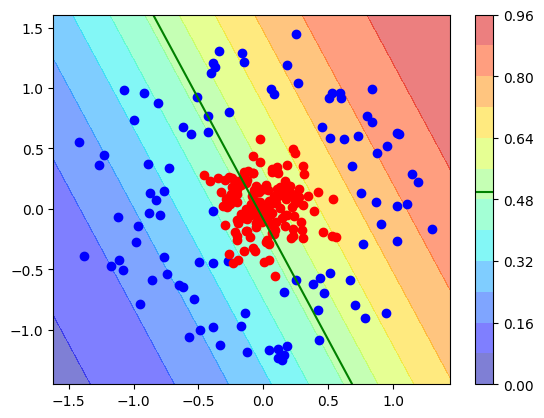

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5712 - loss: 0.7012 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


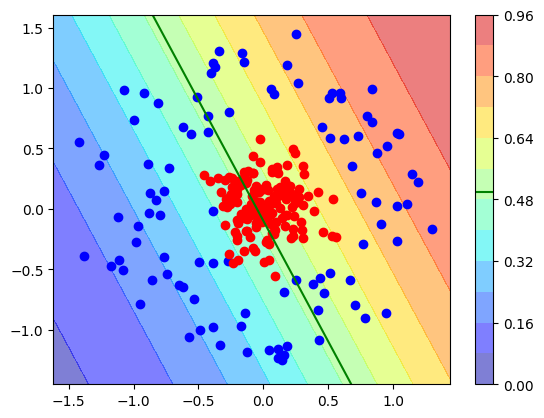

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5793 - loss: 0.7131 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


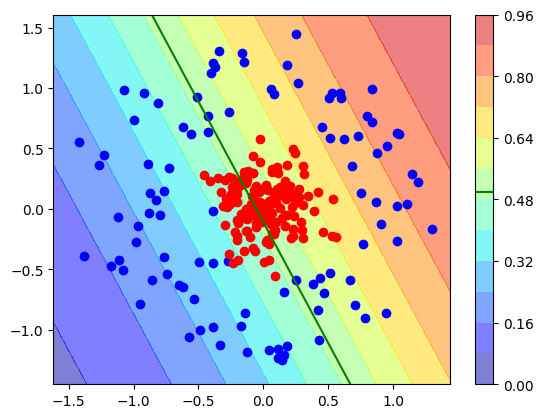

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5475 - loss: 0.7238 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


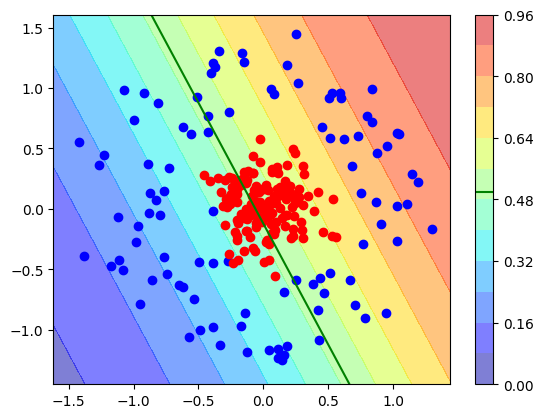

In [30]:
# -- TODO --
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model_2.build((None, 2))
# -- TODO --

model_2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_2.summary()


plot_grid_of_model(model_2, inputs, labels)
plt.show()
for i in range(10):
  model_2.fit(x=inputs, y=labels)
  plot_grid_of_model(model_2, inputs, labels)
  plt.show()

Then let's try to solve the task with a more complex network instead of a single neuron!

**Task:**
- a) Create a neural network consisting of two Dense layers!
  - The new layer should be **before** the layer with 1 neuron using `sigmoid` activation,
  - contain 2 neurons, and apply `relu` activation!
  - Describe in the next cell what you observe!
- b)
  - Change the number of neurons in the first Dense layer to 3!
  - Describe in the next cell what you observe!
- c)
  - Change the number of neurons in the first Dense layer to 10!
  - Describe in the next cell what you observe!

- d) Create a neural network consisting of three Dense layers!
  - The new layer should be before the layer with 1 neuron using `sigmoid` activation,
  - the two hidden layers should contain 2 neurons each, and apply `relu` activation!
  - Describe in the next cell what you observe!
- e)
  - Change the number of neurons in the two hidden layers to 5!
  - Describe in the next cell what you observe!


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


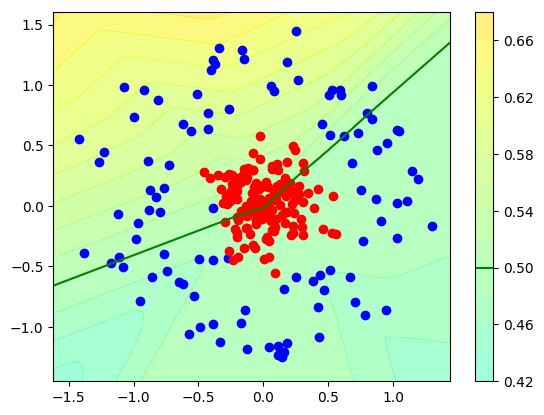

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6198 - loss: 0.7020  
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7196 - loss: 0.6934 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6545 - loss: 0.6844 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6536 - loss: 0.6770 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6230 - loss: 0.6646 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6266 - loss: 0.6587 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6630 - loss: 0.6391 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6418 - loss: 0.6340 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6315 - loss: 0.6288 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6485 - loss: 0.6275 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


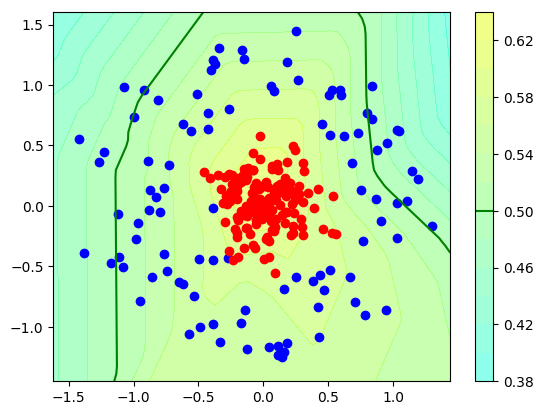

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7130 - loss: 0.5948 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7009 - loss: 0.5973 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7475 - loss: 0.5782 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7098 - loss: 0.5879 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7564 - loss: 0.5781 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7257 - loss: 0.5804 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7786 - loss: 0.5541 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7496 - loss: 0.5735 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7892 - loss: 0.5496 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7950 - loss: 0.5465 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


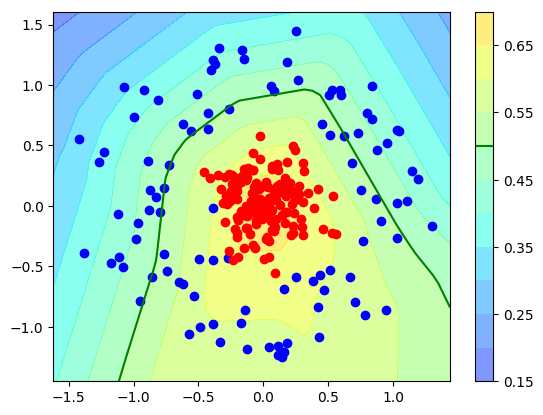

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8365 - loss: 0.5292 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8304 - loss: 0.5356 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8327 - loss: 0.5307 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8345 - loss: 0.5271 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8354 - loss: 0.5193 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8436 - loss: 0.5222 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8093 - loss: 0.5252  
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8504 - loss: 0.5097  
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8195 - loss: 0.5273 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8831 - loss: 0.4895 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


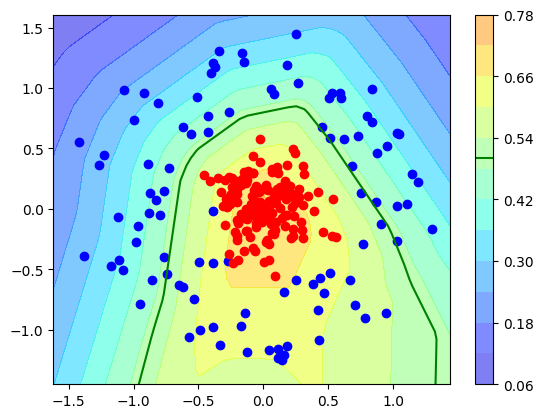

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8358 - loss: 0.5146 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8518 - loss: 0.4889  
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8308 - loss: 0.5066  
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8803 - loss: 0.4692  
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8638 - loss: 0.4831  
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8471 - loss: 0.4780 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8746 - loss: 0.4656 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8945 - loss: 0.4522  
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8608 - loss: 0.4610 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8524 - loss: 0.4622 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


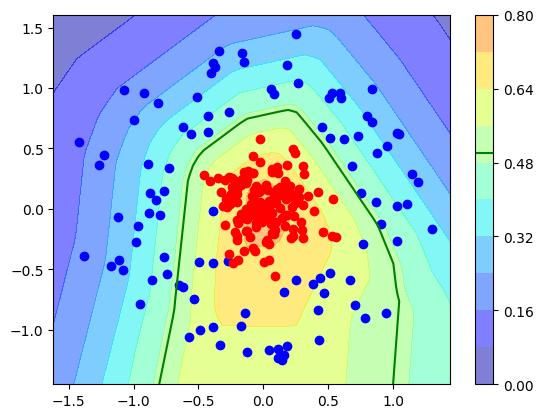

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8900 - loss: 0.4349 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8731 - loss: 0.4392 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8907 - loss: 0.4360 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8641 - loss: 0.4415  
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.4419 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8820 - loss: 0.4312 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8914 - loss: 0.4160 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8789 - loss: 0.4315 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8858 - loss: 0.4173 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9071 - loss: 0.3903 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


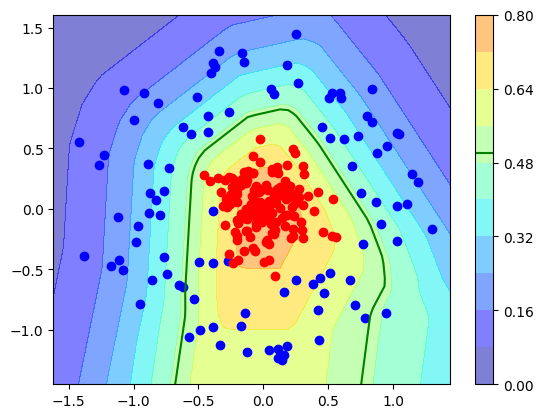

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8935 - loss: 0.4021 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8935 - loss: 0.3966 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8593 - loss: 0.4175 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8627 - loss: 0.4092 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8796 - loss: 0.3984 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9059 - loss: 0.3772 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8901 - loss: 0.3803 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9060 - loss: 0.3839 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8960 - loss: 0.3647 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9088 - loss: 0.3714 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


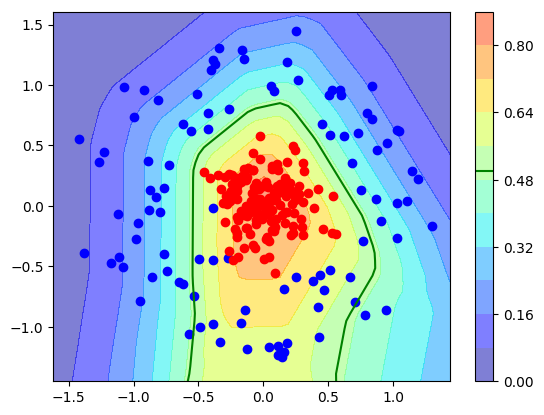

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8941 - loss: 0.3604 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8830 - loss: 0.3807 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9325 - loss: 0.3477 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8687 - loss: 0.3839 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9070 - loss: 0.3448 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8968 - loss: 0.3561  
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9016 - loss: 0.3445 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9124 - loss: 0.3346 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9038 - loss: 0.3350 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9064 - loss: 0.3308 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


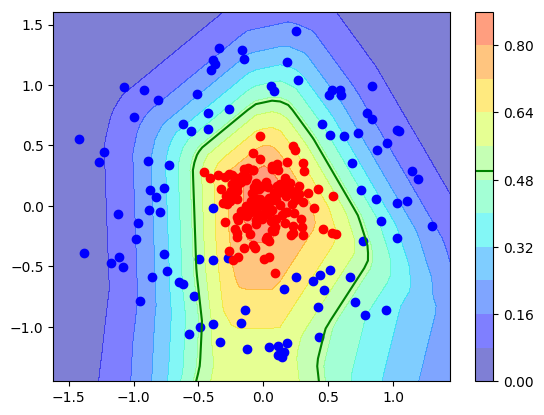

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9013 - loss: 0.3338 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9093 - loss: 0.3282 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8976 - loss: 0.3285 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8967 - loss: 0.3301 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9095 - loss: 0.3196 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9077 - loss: 0.3169 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9332 - loss: 0.3001 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9336 - loss: 0.2906 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9024 - loss: 0.3190 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8973 - loss: 0.3149 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


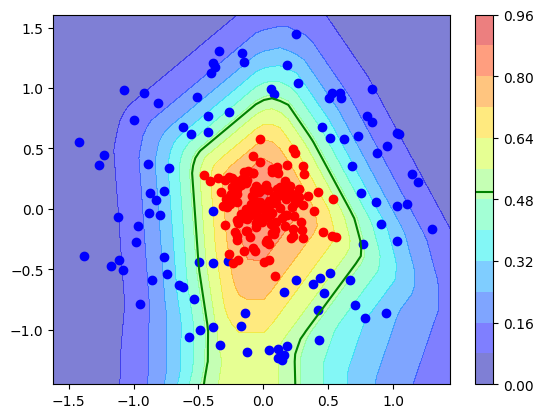

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9140 - loss: 0.2933 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9027 - loss: 0.3123 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9005 - loss: 0.3081 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9279 - loss: 0.2815 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9189 - loss: 0.2939 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9283 - loss: 0.2706 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9123 - loss: 0.2921 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9253 - loss: 0.2745 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9326 - loss: 0.2884 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9325 - loss: 0.2819 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


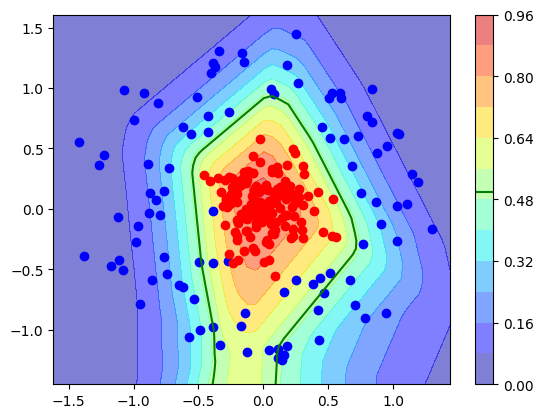

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9435 - loss: 0.2744 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9350 - loss: 0.2641 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9303 - loss: 0.2748 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9546 - loss: 0.2580 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9437 - loss: 0.2391  
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9372 - loss: 0.2563 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9579 - loss: 0.2489 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9378 - loss: 0.2628 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9497 - loss: 0.2548 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9580 - loss: 0.2405 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


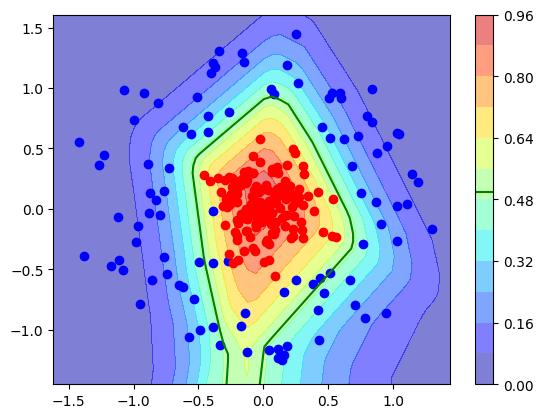

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9652 - loss: 0.2446 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9517 - loss: 0.2486  
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9610 - loss: 0.2309  
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9534 - loss: 0.2478  
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9736 - loss: 0.2278  
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9599 - loss: 0.2236  
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9736 - loss: 0.2093  
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9564 - loss: 0.2251  
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9735 - loss: 0.2110 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9684 - loss: 0.2116  
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


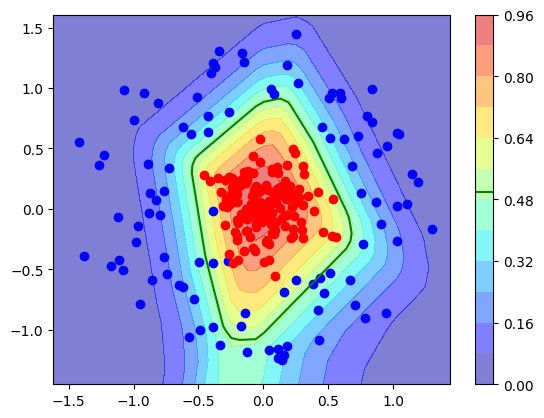

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9805 - loss: 0.2112 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9626 - loss: 0.2287 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9690 - loss: 0.2123  
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9634 - loss: 0.2147 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9797 - loss: 0.1927  
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9799 - loss: 0.1954 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9812 - loss: 0.1952 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9602 - loss: 0.2035 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9783 - loss: 0.1871 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9834 - loss: 0.1939  
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


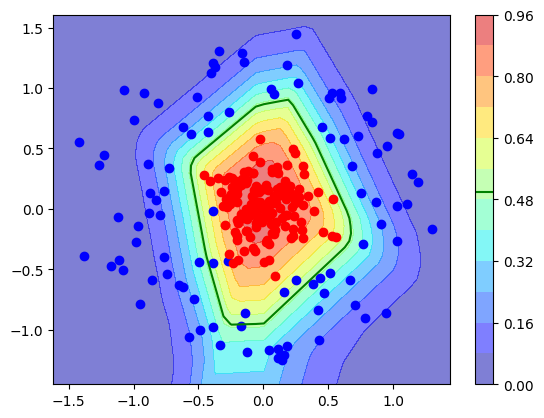

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9696 - loss: 0.1866 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9777 - loss: 0.1841 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.1836  
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9811 - loss: 0.1794  
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9733 - loss: 0.1829 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9856 - loss: 0.1629 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9728 - loss: 0.1704 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9743 - loss: 0.1801 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9825 - loss: 0.1704  
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9882 - loss: 0.1645  
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


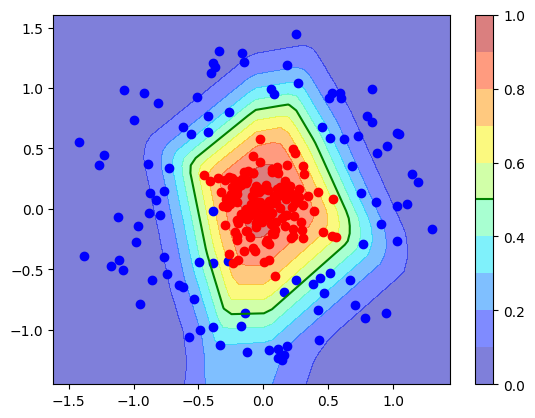

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9778 - loss: 0.1739 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9799 - loss: 0.1744 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9862 - loss: 0.1627 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9936 - loss: 0.1530 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9840 - loss: 0.1680 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9813 - loss: 0.1705 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9840 - loss: 0.1507 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9728 - loss: 0.1539 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9698 - loss: 0.1755 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9827 - loss: 0.1547  
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


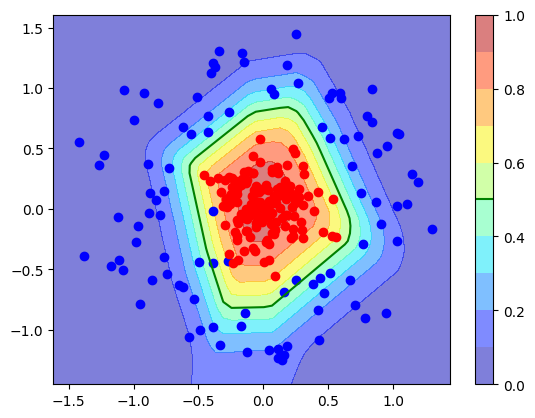

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9828 - loss: 0.1513 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9779 - loss: 0.1711 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9826 - loss: 0.1407 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9682 - loss: 0.1595  
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9897 - loss: 0.1402 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9665 - loss: 0.1560 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9840 - loss: 0.1366 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - loss: 0.1450 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9757 - loss: 0.1485  
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9787 - loss: 0.1447 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


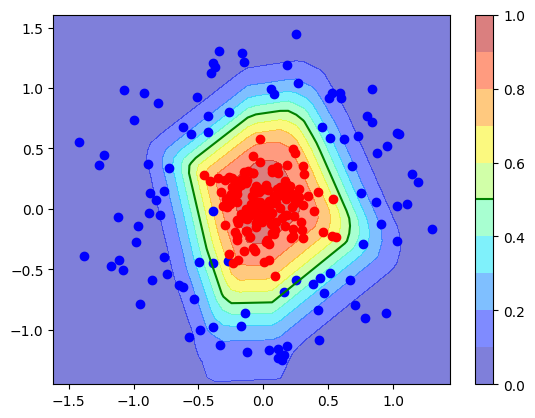

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9871 - loss: 0.1385 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9773 - loss: 0.1431 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9843 - loss: 0.1356  
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9887 - loss: 0.1342  
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9862 - loss: 0.1343  
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.1226  
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9873 - loss: 0.1352  
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9813 - loss: 0.1275 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9865 - loss: 0.1157 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9852 - loss: 0.1358 
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


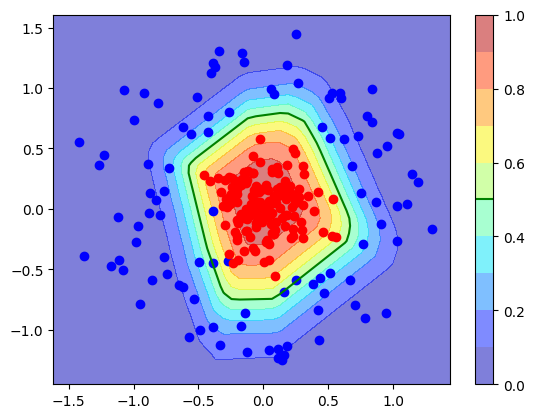

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9886 - loss: 0.1133 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.1208 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9796 - loss: 0.1242 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9758 - loss: 0.1329 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9886 - loss: 0.1255 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9843 - loss: 0.1202  
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9920 - loss: 0.1207 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9902 - loss: 0.1202  
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9835 - loss: 0.1175 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9897 - loss: 0.1127  
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


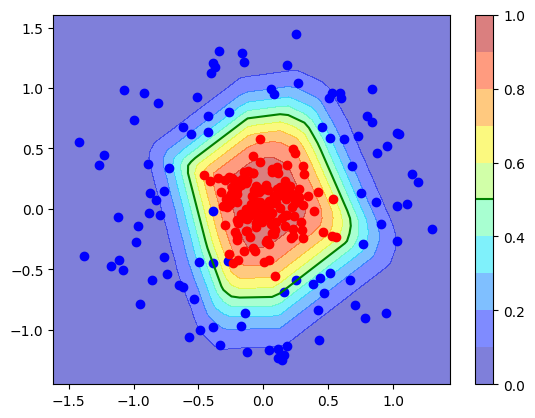

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9810 - loss: 0.1307 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9937 - loss: 0.1118  
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9867 - loss: 0.1175  
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9755 - loss: 0.1312  
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9880 - loss: 0.1159  
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9866 - loss: 0.1111  
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9925 - loss: 0.0975  
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9887 - loss: 0.1093 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9892 - loss: 0.1097 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9861 - loss: 0.1171  
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


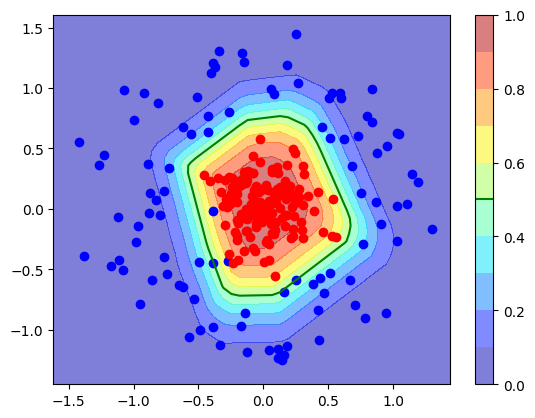

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9819 - loss: 0.1139 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9913 - loss: 0.1040 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.1077 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9852 - loss: 0.1106 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9942 - loss: 0.1021  
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9909 - loss: 0.0972  
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9873 - loss: 0.0992  
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9890 - loss: 0.1020 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9866 - loss: 0.1116  
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9916 - loss: 0.1002  
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


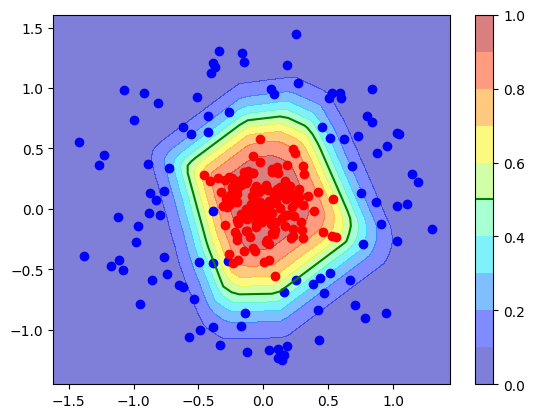

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9837 - loss: 0.1071 
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9909 - loss: 0.1082 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9954 - loss: 0.1036 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9918 - loss: 0.0959  
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9906 - loss: 0.1003 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9889 - loss: 0.0990 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9922 - loss: 0.0961 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9916 - loss: 0.1067 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9866 - loss: 0.1023  
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9854 - loss: 0.1043  
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


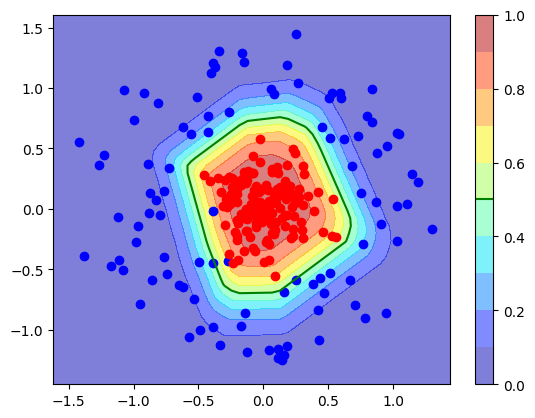

In [38]:
# -- TODO --
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(10, activation="relu"))
model_3.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model_3.build((None, 2))
# -- TODO --

model_3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.summary()


plot_grid_of_model(model_3, inputs, labels)
plt.show()
for i in range(20):
  model_3.fit(x=inputs, y=labels, epochs=10)
  plot_grid_of_model(model_3, inputs, labels)
  plt.show()

## **5.3 Questions**

What do you observe in the case of 1 hidden layer using 2 neurons? Why?



```
# TODO:
Non-linear Decision Boundary
```

What do you observe in the case of 1 hidden layer using 3 neurons?


```
# TODO:
```

What do you observe in the case of 1 hidden layer using 10 neurons?


```
# TODO:
```

What do you observe in the case of 2 hidden layers using 2-2 neurons?


```
# TODO:
```
What do you observe in the case of 2 hidden layers using 5-5 neurons?


```
# TODO:
```

# **6. Task Submission**

## 6.1 Task

In this homework assignment, the goal will be to predict house prices using a neural network. The original dataset is sourced from [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html). A brief description of it can be found [here](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html). Using the neural network, we need to estimate the median value of houses based on 8 characteristics typical of the neighborhood (median income, average house age, average number of rooms, etc.). The objective is to make the prediction as accurate as possible, which will be determined based on MSE (mean squared error).

The appropriate dataset can be downloaded from Moodle. The link to the dataset can be found under the homework section in Moodle at the "Dataset assignment" (which is a 0-point quiz). [Link to Moodle](https://edu.vik.bme.hu/mod/quiz/view.php?id=152392)  
There is also an "mse range" interval listed here, which indicates the MSE values corresponding to the maximum and minimum scores. The obtained score will be determined linearly between these values and also through nearest neighbor interpolation.

The task can be solved in any environment. Since Python is the most widely used in this field, we will provide assistance for that.

## 6.2 Submission

A .csv file containing the predicted values must be uploaded to the Moodle interface, meaning it will contain one float value per line. This can easily be done in a Python environment using NumPy with the `np.savetxt` function.

```python
np.savetxt('housing_y_test.csv', y_test, delimiter=",", fmt="%g")


Thus, the resulting .csv file should contain a single output per line:

```python
2.611
0.22
3.4701
0.35
3.61
0.267
0.6
1.245
4.20


## 6.3 Useful Information

### Solution Environment
The recommended solution environment is Google Colaboratory.
It is also recommended to use the following Python libraries:

- numpy: for vector and matrix operations
- tensorflow.keras: for creating and training neural networks
- matplotlib: for creating plots
- pandas: for reading training and test data

### Files

Dataset link:

https://edu.vik.bme.hu/mod/quiz/view.php?id=152392

In the .zip file downloaded from the URL under "Dataset assignment," there are 3 .csv files:

- `housing_x_train_xxxxxx.csv`: input features of the training dataset
- `housing_y_train_xxxxxx.csv`: expected output of the training dataset
- `housing_x_test_xxxxxx.csv`: input features of the test dataset  

These can be easily read with a Pandas command (`import pandas as pd`):

```python
pd.read_csv(f'{file_name}.csv', sep=',', encoding='utf-8').values


This will return a NumPy array, which is easy to work with afterwards.

### Data Preprocessing
Neural networks learn more easily when the data is normalized. For this, it is advisable to use the `MinMaxScaler` class from sklearn.

What should not be forgotten is that if the training data has been normalized, the test data must also be normalized using the same parameters, and the predicted values should be transformed back before writing to a file.


Submission link:

https://edu.vik.bme.hu/mod/quiz/view.php?id=152395